In [ ]:
pip install bokeh

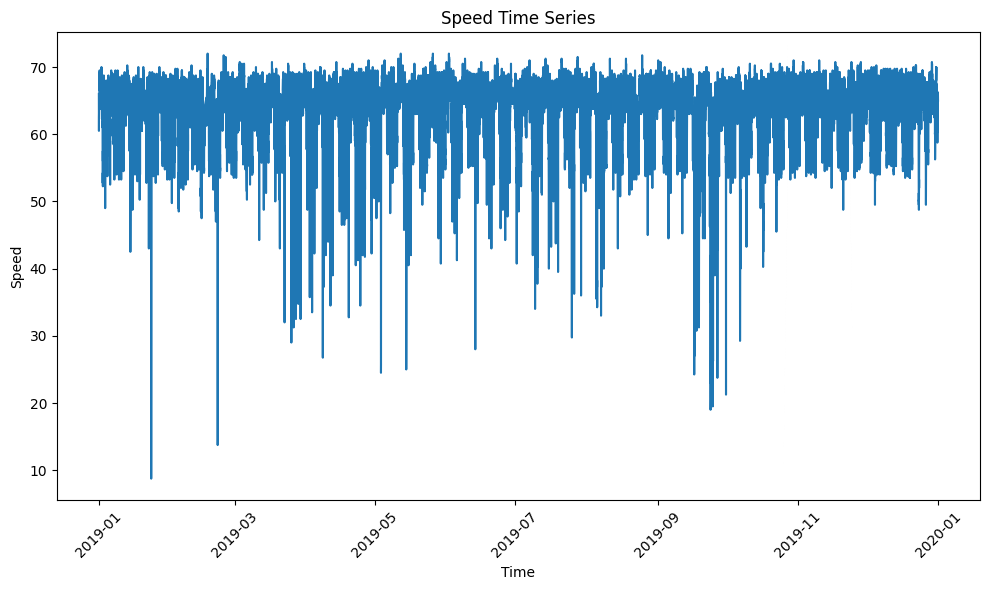

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('E:/xie/Sensor Files/3. filled w empty rows - fixed to 35040 rows/2019/10.2.268_emptyrows.csv')

# Convert 'DateTimeStamp' column to datetime type
df['DateTimeStamp'] = pd.to_datetime(df['DateTimeStamp'])

# Set 'DateTimeStamp' column as index
df.set_index('DateTimeStamp', inplace=True)

# Plot the time series graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=df['Speed'])
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Speed Time Series')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
